In [1]:
from new_attempt.stateless import *

In [2]:
from custom_libraries.utilities import *

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
regionSymbols = RegionSymbols(1)

In [6]:
customPlanck = sq.Symbol('hbarX', real = True, positive = True, nonzero = True)

In [7]:
waveEquation = constantPotentialTimeIndependentSchroedingerEquation1D(regionSymbols, reducedPlanckConstant = customPlanck)

In [8]:
waveEquation

Eq(V_1*psi_1(x) - hbarX**2*Derivative(psi_1(x), (x, 2))/(2*m), E_{total}*psi_1(x))

In [9]:
normalization = simpleWaveFunctionNormalization(regionSymbols.startDistance, regionSymbols.distance, regionSymbols)

In [10]:
normalization

Eq(Integral(psi_1(x)*conjugate(psi_1(x)), (x, L_0, L_1)), N_1)

In [11]:
boundries = {
        regionSymbols.waveFunction(regionSymbols.startDistance) : sp.Symbol('B_{1}'), 
        regionSymbols.waveFunction(regionSymbols.distance) : sp.Symbol('B_{2}')
    }

In [12]:
generalSolution = sp.dsolve(waveEquation, ics = boundries)

In [13]:
generalSolution

Eq(psi_1(x), (B_{1}*exp(sqrt(2)*L_0*sqrt(m)*sqrt(-E_{total} + V_1)/hbarX)/(exp(2*sqrt(2)*L_0*sqrt(m)*sqrt(-E_{total} + V_1)/hbarX) - exp(2*sqrt(2)*L_1*sqrt(m)*sqrt(-E_{total} + V_1)/hbarX)) - B_{2}*exp(sqrt(2)*L_1*sqrt(m)*sqrt(-E_{total} + V_1)/hbarX)/(exp(2*sqrt(2)*L_0*sqrt(m)*sqrt(-E_{total} + V_1)/hbarX) - exp(2*sqrt(2)*L_1*sqrt(m)*sqrt(-E_{total} + V_1)/hbarX)))*exp(sqrt(2)*sqrt(m)*x*sqrt(-E_{total} + V_1)/hbarX) + (-B_{1}*exp(sqrt(2)*L_0*sqrt(m)*sqrt(-E_{total} + V_1)/hbarX)*exp(2*sqrt(2)*L_1*sqrt(m)*sqrt(-E_{total} + V_1)/hbarX)/(exp(2*sqrt(2)*L_0*sqrt(m)*sqrt(-E_{total} + V_1)/hbarX) - exp(2*sqrt(2)*L_1*sqrt(m)*sqrt(-E_{total} + V_1)/hbarX)) + B_{2}*exp(2*sqrt(2)*L_0*sqrt(m)*sqrt(-E_{total} + V_1)/hbarX)*exp(sqrt(2)*L_1*sqrt(m)*sqrt(-E_{total} + V_1)/hbarX)/(exp(2*sqrt(2)*L_0*sqrt(m)*sqrt(-E_{total} + V_1)/hbarX) - exp(2*sqrt(2)*L_1*sqrt(m)*sqrt(-E_{total} + V_1)/hbarX)))*exp(-sqrt(2)*sqrt(m)*x*sqrt(-E_{total} + V_1)/hbarX))

In [14]:
harmonicConstant = extractHarmonicConstant(regionSymbols, waveEquation)

In [15]:
harmonicConstant

Eq(k_1, sqrt(2)*sqrt(m)*sqrt(-E_{total} + V_1)/hbarX)

In [16]:
generalSolution = generalSolution.subs({harmonicConstant.rhs : harmonicConstant.lhs})

In [17]:
generalSolution

Eq(psi_1(x), (B_{1}*exp(L_0*k_1)/(exp(2*L_0*k_1) - exp(2*L_1*k_1)) - B_{2}*exp(L_1*k_1)/(exp(2*L_0*k_1) - exp(2*L_1*k_1)))*exp(k_1*x) + (-B_{1}*exp(L_0*k_1)*exp(2*L_1*k_1)/(exp(2*L_0*k_1) - exp(2*L_1*k_1)) + B_{2}*exp(2*L_0*k_1)*exp(L_1*k_1)/(exp(2*L_0*k_1) - exp(2*L_1*k_1)))*exp(-k_1*x))

In [18]:
def extractWaveCoefficents(exponentialEquation, position = POSITION_SYMBOL): 
    C0 = sp.Wild("C0")
    C1 = sp.Wild("C1")
    harmonic = sp.Wild("k")
    results = exponentialEquation.match(C0 * sp.exp(harmonic * position) + C1 * sp.exp(-harmonic * position))
    return {
            "transmission" : results[C0], 
            "reflection" : results[C1], 
            "harmonicConstant" : results[harmonic]
    }

In [19]:
coefficeints = extractWaveCoefficents(generalSolution.rhs, POSITION_SYMBOL)

In [20]:
coefficeints

{'transmission': B_{1}*exp(L_0*k_1)/(exp(2*L_0*k_1) - exp(2*L_1*k_1)) - B_{2}*exp(L_1*k_1)/(exp(2*L_0*k_1) - exp(2*L_1*k_1)),
 'reflection': -B_{1}*exp(L_0*k_1)*exp(2*L_1*k_1)/(exp(2*L_0*k_1) - exp(2*L_1*k_1)) + B_{2}*exp(2*L_0*k_1)*exp(L_1*k_1)/(exp(2*L_0*k_1) - exp(2*L_1*k_1)),
 'harmonicConstant': k_1}

In [21]:
exponential = generalSolution.subs({
        coefficeints["transmission"] : sp.Symbol("C0"), 
        coefficeints["reflection"] : sp.Symbol("C1")
    })

In [202]:
coefficeints["transmission"]

B_{1}*exp(L_0*k_1)/(exp(2*L_0*k_1) - exp(2*L_1*k_1)) - B_{2}*exp(L_1*k_1)/(exp(2*L_0*k_1) - exp(2*L_1*k_1))

In [203]:
coefficeints["reflection"]

-B_{1}*exp(L_0*k_1)*exp(2*L_1*k_1)/(exp(2*L_0*k_1) - exp(2*L_1*k_1)) + B_{2}*exp(2*L_0*k_1)*exp(L_1*k_1)/(exp(2*L_0*k_1) - exp(2*L_1*k_1))

In [22]:
exponential

Eq(psi_1(x), C0*exp(k_1*x) + C1*exp(-k_1*x))

In [23]:
def lambdifyFromFree(symbolic): 
    nameSubstitution = {name : symbolicToIdentifier(str(name)) for name in list(symbolic.free_symbols)}
    parameters = orderNames(list(nameSubstitution.values()))
    return sp.lambdify(parameters, symbolic.subs(nameSubstitution))

In [24]:
forwardTransmissionCoefficient = lambdifyFromFree(coefficeints["transmission"])

In [25]:
forwardTransmissionCoefficient

<function _lambdifygenerated(B_OCB1CCB, B_OCB2CCB, L_0, L_1, k_1)>

In [26]:
backwardReflectionCoefficient = lambdifyFromFree(coefficeints["reflection"])

In [27]:
backwardReflectionCoefficient

<function _lambdifygenerated(B_OCB1CCB, B_OCB2CCB, L_0, L_1, k_1)>

In [28]:
expoentialFunction = lambdifyFromFree(exponential.rhs)

In [29]:
expoentialFunction

<function _lambdifygenerated(C0, C1, k_1, x)>

In [30]:
harmonicConstant.rhs.free_symbols

{E_{total}, V_1, hbarX, m}

In [31]:
lambdifiedHarmonicConstant = lambdifyFromFree(harmonicConstant.rhs)

In [32]:
lambdifiedHarmonicConstant

<function _lambdifygenerated(E_OCBtotalCCB, V_1, hbarX, m)>

In [33]:
lambdifiedWaveFunction = lambdifyFromFree(generalSolution.rhs)

In [34]:
lambdifiedWaveFunction

<function _lambdifygenerated(B_OCB1CCB, B_OCB2CCB, L_0, L_1, k_1, x)>

In [35]:
#group_constants(generalSolution.rhs, generalSolution.rhs.free_values)

In [282]:
hbarXValue = 1e-10

In [283]:
mass = hbarXValue * 10

In [284]:
totalEnergy = mass

In [285]:
constantPotental = totalEnergy * 100

In [286]:
k_1 = lambdifiedHarmonicConstant(totalEnergy, constantPotental, hbarXValue, mass)

In [287]:
k_1

140.71247279470293

In [288]:
plotible = lambda B_0, B_1, L_0, L_1, k_1 : lambda x : lambdifiedWaveFunction(B_0, B_0, L_0, L_1, k_1, x)

In [289]:
length = 100 * hbarXValue
start = length
end = start + length

In [290]:
boundry0 = 1 * constantPotental

In [298]:
boundry1 = 1.01 * constantPotental

In [299]:
plotibleWaveFunction = plotible(boundry0, boundry1, start, end, k_1)

In [300]:
plotibleWaveFunction

<function __main__.<lambda>.<locals>.<lambda>(x)>

In [301]:
x = np.arange(start, end, length * 1e-2)
#y = plotibleWaveFunction(x)
#y *= y
ft = forwardTransmissionCoefficient(boundry0, boundry1, start, end, k_1)
br = backwardReflectionCoefficient(boundry0, boundry1, start, end, k_1)

y = expoentialFunction(ft, br, k_1, x)

In [302]:
ft

0.0003553840271476802

In [303]:
br

-0.0003552850271476768

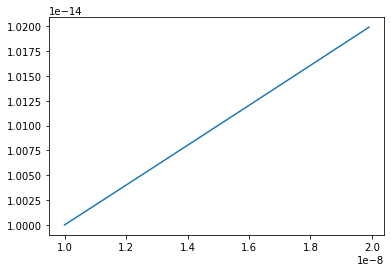

In [304]:
plt.plot(x, y * np.conj(y))

In [305]:
y

array([1.0000e-07, 1.0001e-07, 1.0002e-07, 1.0003e-07, 1.0004e-07,
       1.0005e-07, 1.0006e-07, 1.0007e-07, 1.0008e-07, 1.0009e-07,
       1.0010e-07, 1.0011e-07, 1.0012e-07, 1.0013e-07, 1.0014e-07,
       1.0015e-07, 1.0016e-07, 1.0017e-07, 1.0018e-07, 1.0019e-07,
       1.0020e-07, 1.0021e-07, 1.0022e-07, 1.0023e-07, 1.0024e-07,
       1.0025e-07, 1.0026e-07, 1.0027e-07, 1.0028e-07, 1.0029e-07,
       1.0030e-07, 1.0031e-07, 1.0032e-07, 1.0033e-07, 1.0034e-07,
       1.0035e-07, 1.0036e-07, 1.0037e-07, 1.0038e-07, 1.0039e-07,
       1.0040e-07, 1.0041e-07, 1.0042e-07, 1.0043e-07, 1.0044e-07,
       1.0045e-07, 1.0046e-07, 1.0047e-07, 1.0048e-07, 1.0049e-07,
       1.0050e-07, 1.0051e-07, 1.0052e-07, 1.0053e-07, 1.0054e-07,
       1.0055e-07, 1.0056e-07, 1.0057e-07, 1.0058e-07, 1.0059e-07,
       1.0060e-07, 1.0061e-07, 1.0062e-07, 1.0063e-07, 1.0064e-07,
       1.0065e-07, 1.0066e-07, 1.0067e-07, 1.0068e-07, 1.0069e-07,
       1.0070e-07, 1.0071e-07, 1.0072e-07, 1.0073e-07, 1.0074e

In [306]:
x

array([1.00e-08, 1.01e-08, 1.02e-08, 1.03e-08, 1.04e-08, 1.05e-08,
       1.06e-08, 1.07e-08, 1.08e-08, 1.09e-08, 1.10e-08, 1.11e-08,
       1.12e-08, 1.13e-08, 1.14e-08, 1.15e-08, 1.16e-08, 1.17e-08,
       1.18e-08, 1.19e-08, 1.20e-08, 1.21e-08, 1.22e-08, 1.23e-08,
       1.24e-08, 1.25e-08, 1.26e-08, 1.27e-08, 1.28e-08, 1.29e-08,
       1.30e-08, 1.31e-08, 1.32e-08, 1.33e-08, 1.34e-08, 1.35e-08,
       1.36e-08, 1.37e-08, 1.38e-08, 1.39e-08, 1.40e-08, 1.41e-08,
       1.42e-08, 1.43e-08, 1.44e-08, 1.45e-08, 1.46e-08, 1.47e-08,
       1.48e-08, 1.49e-08, 1.50e-08, 1.51e-08, 1.52e-08, 1.53e-08,
       1.54e-08, 1.55e-08, 1.56e-08, 1.57e-08, 1.58e-08, 1.59e-08,
       1.60e-08, 1.61e-08, 1.62e-08, 1.63e-08, 1.64e-08, 1.65e-08,
       1.66e-08, 1.67e-08, 1.68e-08, 1.69e-08, 1.70e-08, 1.71e-08,
       1.72e-08, 1.73e-08, 1.74e-08, 1.75e-08, 1.76e-08, 1.77e-08,
       1.78e-08, 1.79e-08, 1.80e-08, 1.81e-08, 1.82e-08, 1.83e-08,
       1.84e-08, 1.85e-08, 1.86e-08, 1.87e-08, 1.88e-08, 1.89e